# Exploratory Data Analysis of Letters to My Grandma

This notebook explores a collection of letters written to my grandmother by family and friends. We will analyze the content, senders, recipients, dates, and other features to uncover patterns and insights from this unique family archive.


**Outline:**
1. Import Required Libraries
2. Load and Inspect Data
3. Data Cleaning and Preprocessing
4. Basic Statistics and Overview
5. Analyze Letter Lengths
6. Explore Most Common Words
7. Analyze Senders and Recipients
8. Temporal Analysis of Letters
9. Sentiment Analysis of Letters
10. Visualize Key Findings

In [20]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
import re

# Download NLTK stopwords if not already present
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set up matplotlib and seaborn
plt.style.use('seaborn-v0_8')
sns.set_theme()

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Load and Inspect Data
import json

# Load the letters data
with open('../data/letters.json', 'r', encoding='utf-8') as f:
    letters = json.load(f)

df = pd.DataFrame(letters)
df.head()

,is_letter,from,to,date,text,image_path
0,True,Carina,Judy,02/11/2017,"Judy querida, que alegria podermos celebrar ma...",data/all_letters/SCAN0010.jpg
1,True,Sheyla e Carlos,Judith,02/11/2008,"Querida Judith\n\nMesmo ausentes, compartilham...",data/all_letters/SCAN0016_7.jpg
2,True,Ana,Judith,02/11/2002,"Rio, 02/11/2002\nQuerida amiga Judith,\nFoi ma...",data/all_letters/SCAN0061.jpg
3,True,Déci,Judith,02/11/2018,Querida Judith:\n\nQue possamos no ano futuro ...,data/all_letters/SCAN0093.jpg
4,True,None,Judith,15/10/1988,"Rio de Janeiro, 15 de outubro de 1988.\n\nJudi...",data/all_letters/SCAN0133.jpg


In [22]:
df = df[df.is_letter == True]

## Data Cleaning and Preprocessing

We will handle missing values, normalize text fields, and ensure date formats and other fields are consistent for analysis.

In [23]:
# Data Cleaning and Preprocessing

def clean_date(date_str):
    if pd.isnull(date_str):
        return None
    match = re.match(r"^(\d{2})/(\d{2})/(\d{4})$", str(date_str))
    if match:
        return date_str
    return None

# Handle missing values and normalize text fields
df['from'] = df['from'].fillna('').str.strip()
df['to'] = df['to'].fillna('').str.strip()
df['text'] = df['text'].fillna('').str.strip()
df['date'] = df['date'].apply(clean_date)

# Show missing values summary
df.isnull().sum()

is_letter       0
from            0
to              0
date          117
text            0
image_path      0
dtype: int64

## Basic Statistics and Overview

Let's get a high-level overview of the dataset, including the number of letters, unique senders, recipients, and some descriptive statistics.

In [24]:
# Basic Statistics and Overview
print(f"Total letters: {len(df)}")
print(f"Unique senders: {df['from'].nunique()}")
print(f"Unique recipients: {df['to'].nunique()}")

# Show descriptive statistics for text length
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df[['text_length', 'word_count']].describe()

Total letters: 299
Unique senders: 204
Unique recipients: 94


,text_length,word_count
count,299.000000,299.000000
mean,402.030100,68.966555
std,372.790109,65.827354
min,22.000000,3.000000
25%,158.000000,27.000000
50%,270.000000,44.000000
75%,519.500000,86.500000
max,2309.000000,399.000000


## Analyze Letter Lengths

Let's visualize the distribution of letter lengths in terms of characters and words.

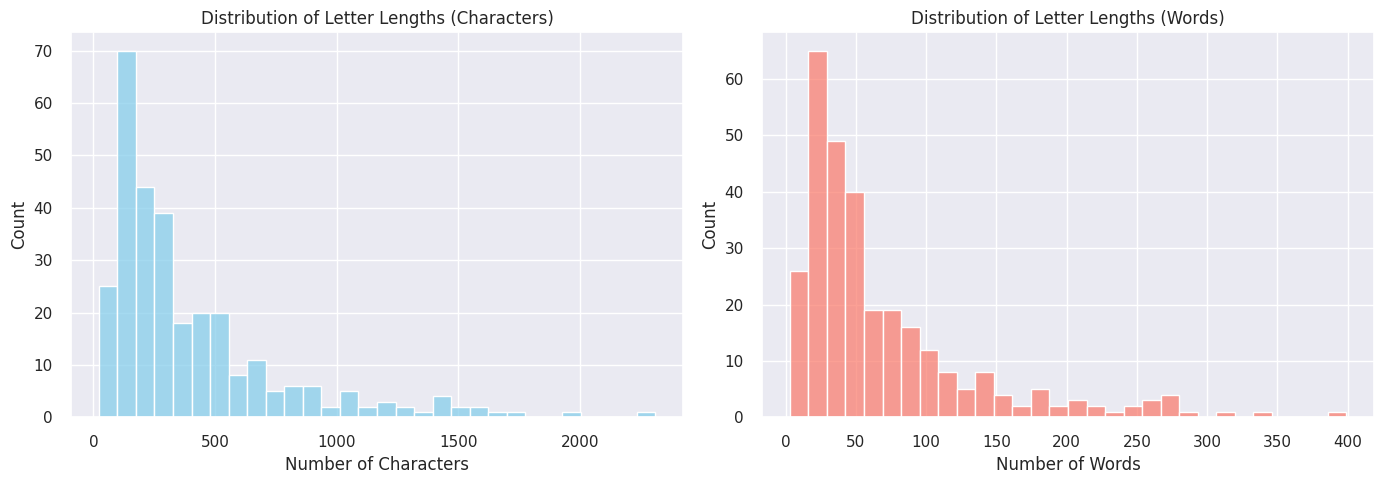

In [25]:
# Visualize the distribution of letter lengths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['text_length'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Letter Lengths (Characters)')
axes[0].set_xlabel('Number of Characters')

sns.histplot(df['word_count'], bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Letter Lengths (Words)')
axes[1].set_xlabel('Number of Words')
plt.tight_layout()
plt.show()

## Explore Most Common Words

Let's find and visualize the most frequent words in the letters, excluding common stopwords.

/tmp/ipykernel_743/1321628677.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


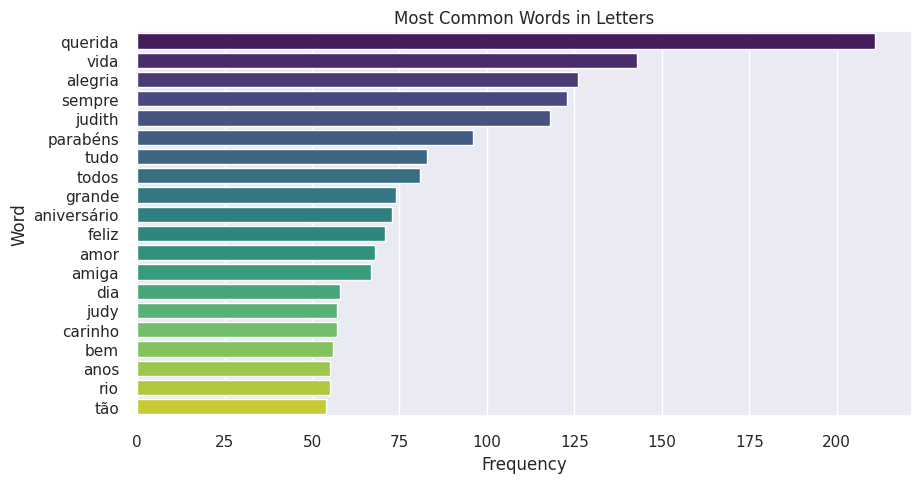

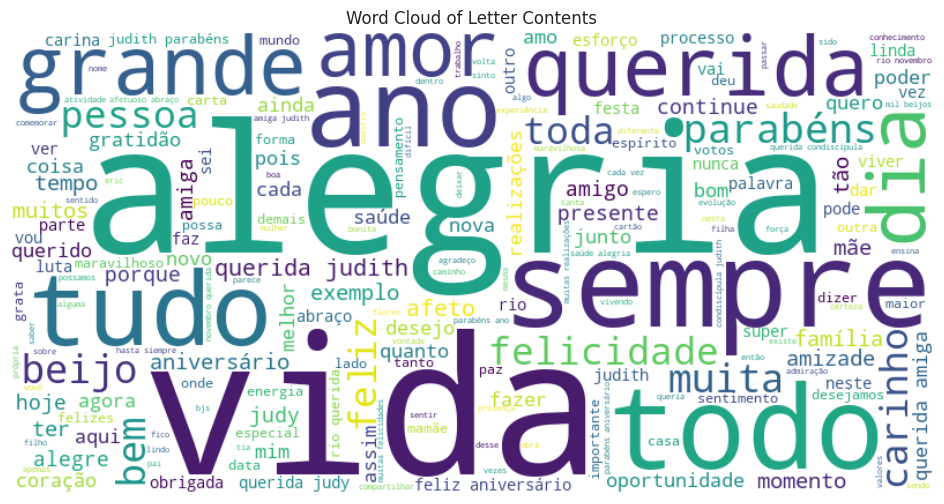

In [26]:
# Tokenize text and remove stopwords
stop_words = set(stopwords.words('portuguese'))
all_words = []
for text in df['text']:
    words = re.findall(r'\b\w+\b', text.lower())
    words = [w for w in words if w not in stop_words and len(w) > 2]
    all_words.extend(words)

word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

# Plot most common words
words, counts = zip(*most_common)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Common Words in Letters')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Letter Contents')
plt.show()

## Analyze Senders and Recipients

Let's visualize the number of letters sent by each sender and received by each recipient.

In [ ]:
# df = df[df['from'] != '']

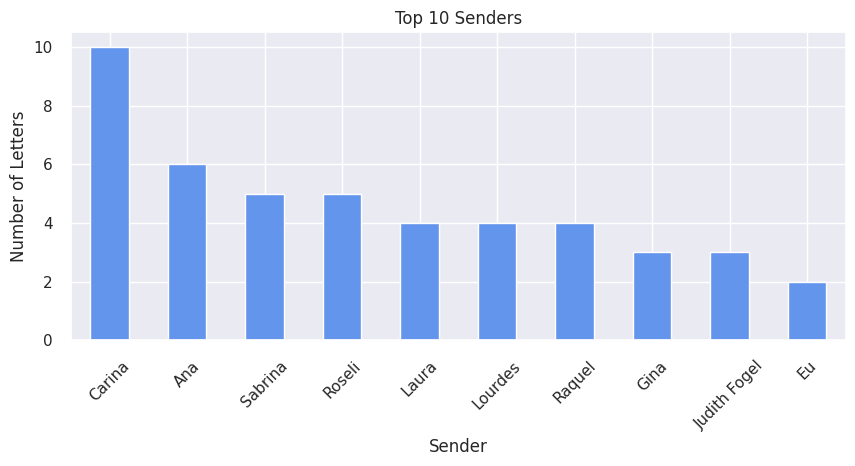

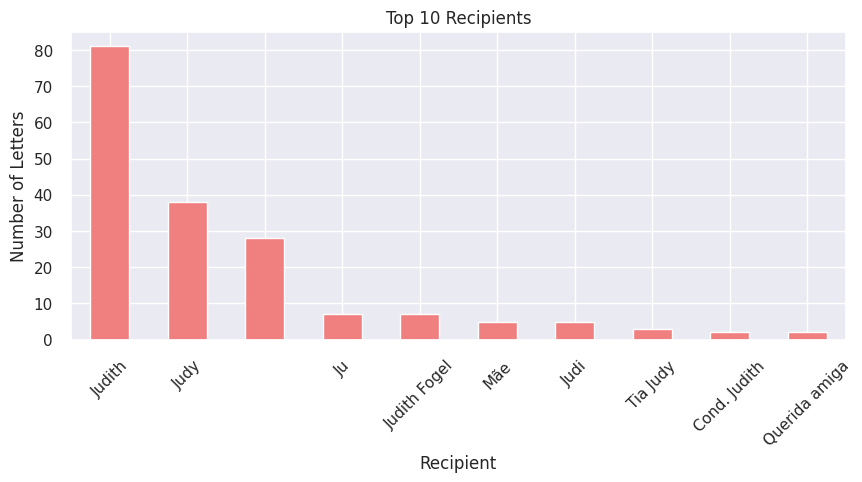

In [46]:
# Top senders
plt.figure(figsize=(10,4))
df['from'].value_counts().head(10).plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 Senders')
plt.xlabel('Sender')
plt.ylabel('Number of Letters')
plt.xticks(rotation=45)
plt.show()

# Top recipients
plt.figure(figsize=(10,4))
df['to'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Recipients')
plt.xlabel('Recipient')
plt.ylabel('Number of Letters')
plt.xticks(rotation=45)
plt.show()

## Temporal Analysis of Letters

Let's analyze and plot the number of letters sent over time.

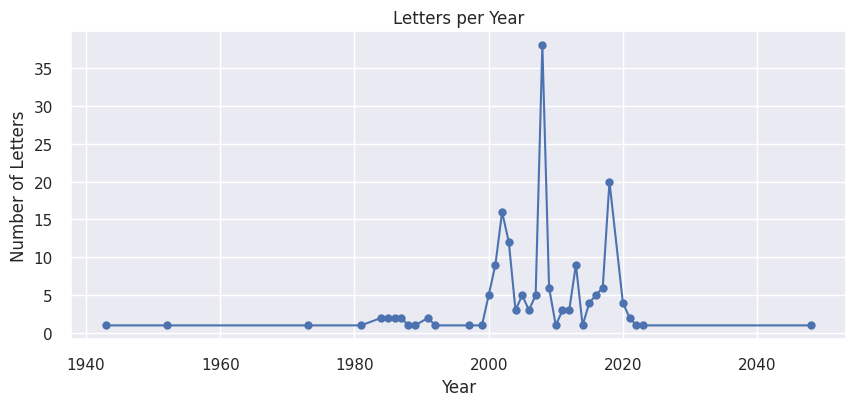

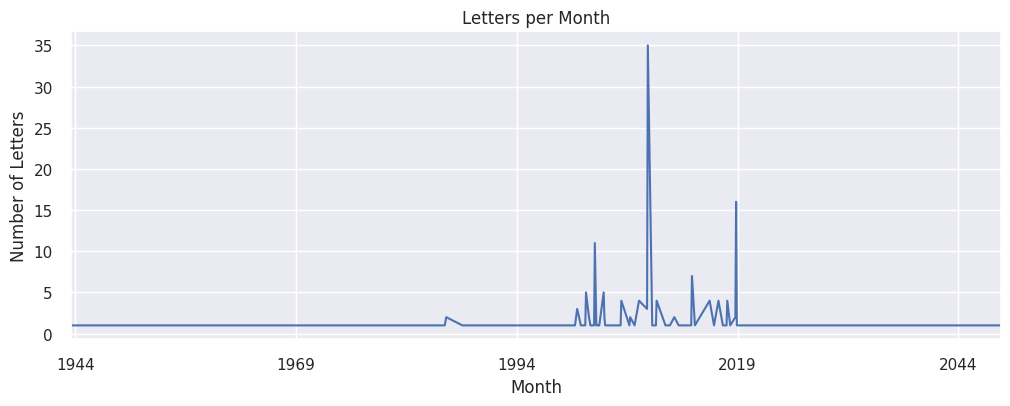

In [28]:
# Convert date to datetime and plot letters over time
df['date_parsed'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

df_by_year = df.dropna(subset=['date_parsed']).groupby(df['date_parsed'].dt.year).size()
df_by_month = df.dropna(subset=['date_parsed']).groupby(df['date_parsed'].dt.to_period('M')).size()

plt.figure(figsize=(10,4))
df_by_year.plot(marker='o')
plt.title('Letters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Letters')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,4))
df_by_month.plot()
plt.title('Letters per Month')
plt.xlabel('Month')
plt.ylabel('Number of Letters')
plt.grid(True)
plt.show()

## Sentiment Analysis of Letters

Let's perform sentiment analysis on the letter texts and visualize the distribution of sentiments.

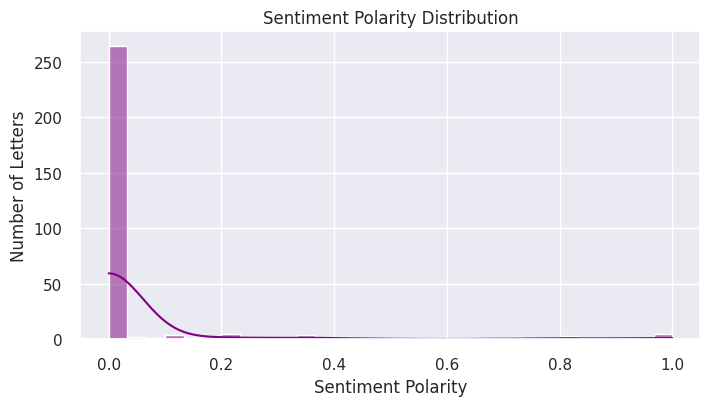

In [29]:
# Sentiment Analysis using TextBlob (works best for English, but can give a rough idea for Portuguese)
from textblob import TextBlob

def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['sentiment'] = df['text'].apply(get_sentiment)

plt.figure(figsize=(8,4))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True, color='purple')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Letters')
plt.show()

## Visualize Key Findings

Let's summarize and visualize the main insights from the analysis with a few key plots.

/tmp/ipykernel_743/2133736267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['from'].value_counts().head(5).values, y=df['from'].value_counts().head(5).index, ax=axes[0], palette='Blues_r')
/tmp/ipykernel_743/2133736267.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['to'].value_counts().head(5).values, y=df['to'].value_counts().head(5).index, ax=axes[1], palette='Reds_r')


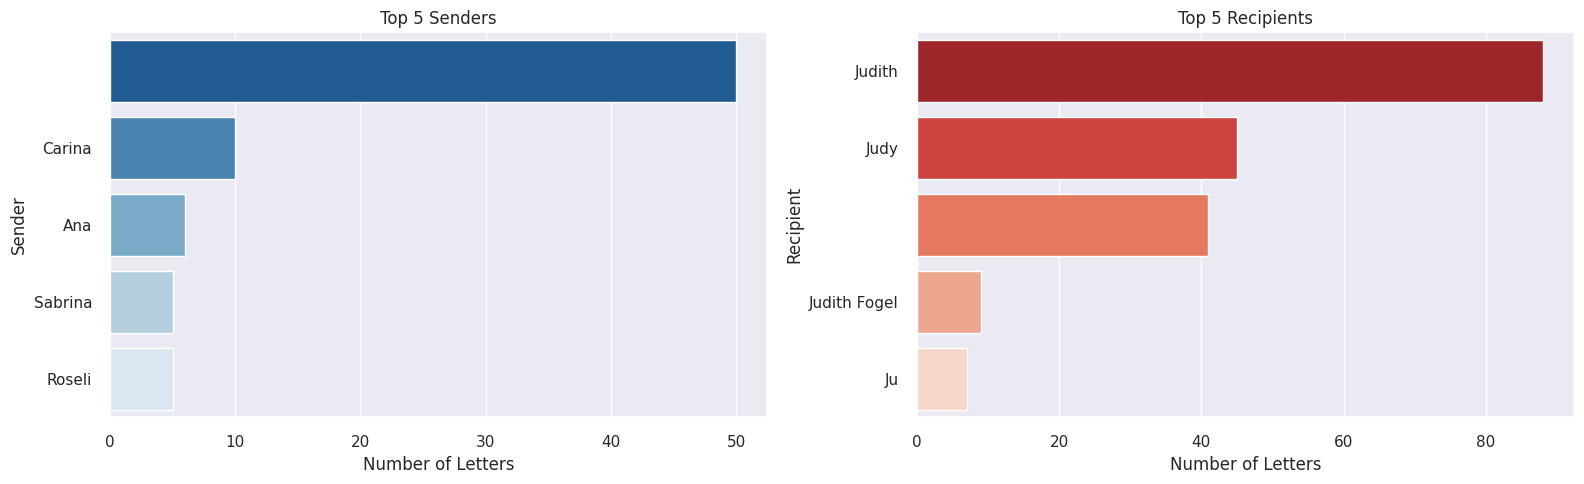

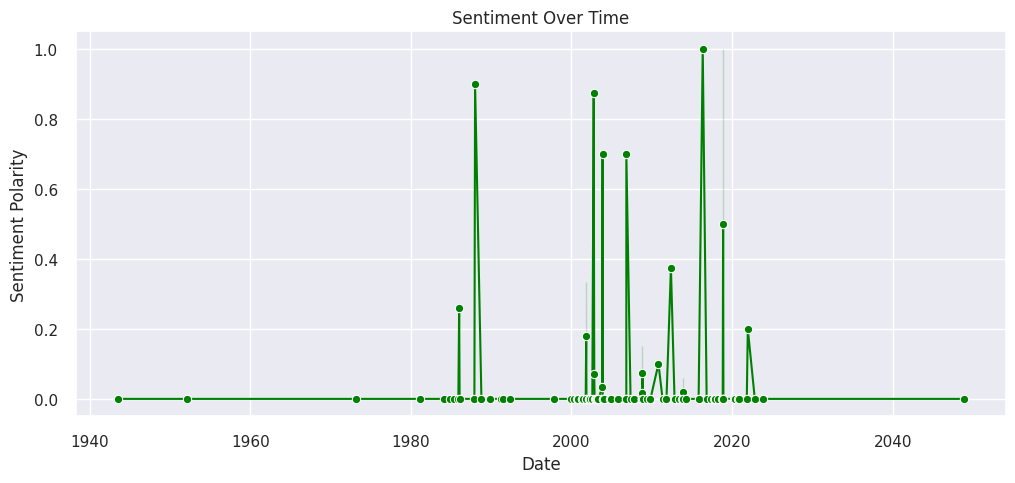

In [30]:
# Visualize Key Findings
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Top senders
sns.barplot(x=df['from'].value_counts().head(5).values, y=df['from'].value_counts().head(5).index, ax=axes[0], palette='Blues_r')
axes[0].set_title('Top 5 Senders')
axes[0].set_xlabel('Number of Letters')
axes[0].set_ylabel('Sender')
# Top recipients
sns.barplot(x=df['to'].value_counts().head(5).values, y=df['to'].value_counts().head(5).index, ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 5 Recipients')
axes[1].set_xlabel('Number of Letters')
axes[1].set_ylabel('Recipient')
plt.tight_layout()
plt.show()

# Sentiment over time
plt.figure(figsize=(12,5))
df_sorted = df.dropna(subset=['date_parsed', 'sentiment']).sort_values('date_parsed')
sns.lineplot(x='date_parsed', y='sentiment', data=df_sorted, marker='o', color='green')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

In [47]:
df

,is_letter,from,to,date,text,image_path,text_length,word_count,date_parsed,sentiment
0,True,Carina,Judy,02/11/2017,"Judy querida, que alegria podermos celebrar ma...",data/all_letters/SCAN0010.jpg,525,89,2017-11-02,0.0
1,True,Sheyla e Carlos,Judith,02/11/2008,"Querida Judith\n\nMesmo ausentes, compartilham...",data/all_letters/SCAN0016_7.jpg,288,47,2008-11-02,0.0
2,True,Ana,Judith,02/11/2002,"Rio, 02/11/2002\nQuerida amiga Judith,\nFoi ma...",data/all_letters/SCAN0061.jpg,347,55,2002-11-02,0.5
3,True,Déci,Judith,02/11/2018,Querida Judith:\n\nQue possamos no ano futuro ...,data/all_letters/SCAN0093.jpg,266,43,2018-11-02,0.0
5,True,Ana,Querida Amiga Judith,02/11/2008,"Querida Amiga Judith,\n\nAquele que consiga et...",data/all_letters/SCAN0036_1.jpg,338,52,2008-11-02,0.0
...,...,...,...,...,...,...,...,...,...,...
400,True,"Gi, Zico e Uz",Judy,None,"Querida Judy,\nEsta data redondinha reve somen...",data/all_letters/SCAN0020_3.jpg,319,53,NaT,0.0
401,True,Thaís (e Rogério),Judith,None,"Querida cond Judith,\n\nP/ vc não precisar usa...",data/all_letters/SCAN0107.jpg,285,49,NaT,0.0
405,True,Eric Jevenc e Alon Jevenc,Vó,None,"Vó,\nParabéns pelo aniversário e por ser essa ...",data/all_letters/SCAN0010_7.jpg,545,94,NaT,0.0
406,True,"Rachel, Bela, Célia, Simone e Ruth",Yudy,None,Yudy\nParabens!!! Saúde!!\nDesejamos que conti...,data/all_letters/SCAN0087.jpg,288,52,NaT,0.0


# Advanced Exploration: Topics, Entities, and Relationships (No LLM)

In this section, we will use classic NLP and network analysis techniques to further explore the content of the letters. We will:
- Discover main topics using topic modeling (LDA)
- Extract named entities (people, places, dates) using spaCy
- Build and visualize a relationship graph of senders and recipients
- Cluster letters by content similarity

No LLMs will be used in this section.

In [50]:
# Topic Modeling with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data
from nltk.corpus import stopwords
pt_stopwords = stopwords.words('portuguese')
texts = df['text'].dropna().tolist()
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=pt_stopwords)
X = vectorizer.fit_transform(texts)

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print_top_words(lda, vectorizer.get_feature_names_out())

Topic #1:
tudo sempre querida bom feliz amor alegria judith vida todos

Topic #2:
querida sempre aniversário grande amiga vida alegria judith amizade vez

Topic #3:
querida super alegria melhor todos judith aniversário muitos bjs rio

Topic #4:
querida parabéns muitas judy felicidades feliz saúde beijos judith tempo

Topic #5:
querida vida alegria judith parabéns afeto sempre 02 abraço rio



In [54]:
# Named Entity Recognition (NER) with spaCy
import spacy
from collections import Counter

# Load Portuguese model (install with: python -m spacy download pt_core_news_sm)
nlp = spacy.load('pt_core_news_sm')

entities = []
for doc in nlp.pipe(df['text'].dropna().tolist(), batch_size=20):
    entities.extend([(ent.text, ent.label_) for ent in doc.ents])

entity_counts = Counter([label for _, label in entities])
print("Entity label counts:", entity_counts)

# Show most common people and places
people = [text for text, label in entities if label == 'PER']
places = [text for text, label in entities if label == 'LOC']
print("Most common people:", Counter(people).most_common(10))
print("Most common places:", Counter(places).most_common(10))

Entity label counts: Counter({'PER': 499, 'LOC': 283, 'MISC': 258, 'ORG': 45})
Most common people: [('Parabéns', 41), ('Judith', 28), ('Querida Judith', 17), ('Querida Judy', 11), ('Ana', 6), ('Espero', 6), ('Judith Fogel', 5), ('Agradeço', 4), ('Henrique', 4), ('Raquel', 4)]
Most common places: [('Rio', 39), ('Querida', 19), ('Parabéns', 14), ('Carina', 10), ('Beijos', 8), ('Maestro', 6), ('Feliz Aniversário', 5), ('Saúde', 4), ('alegre', 4), ('Grata', 3)]


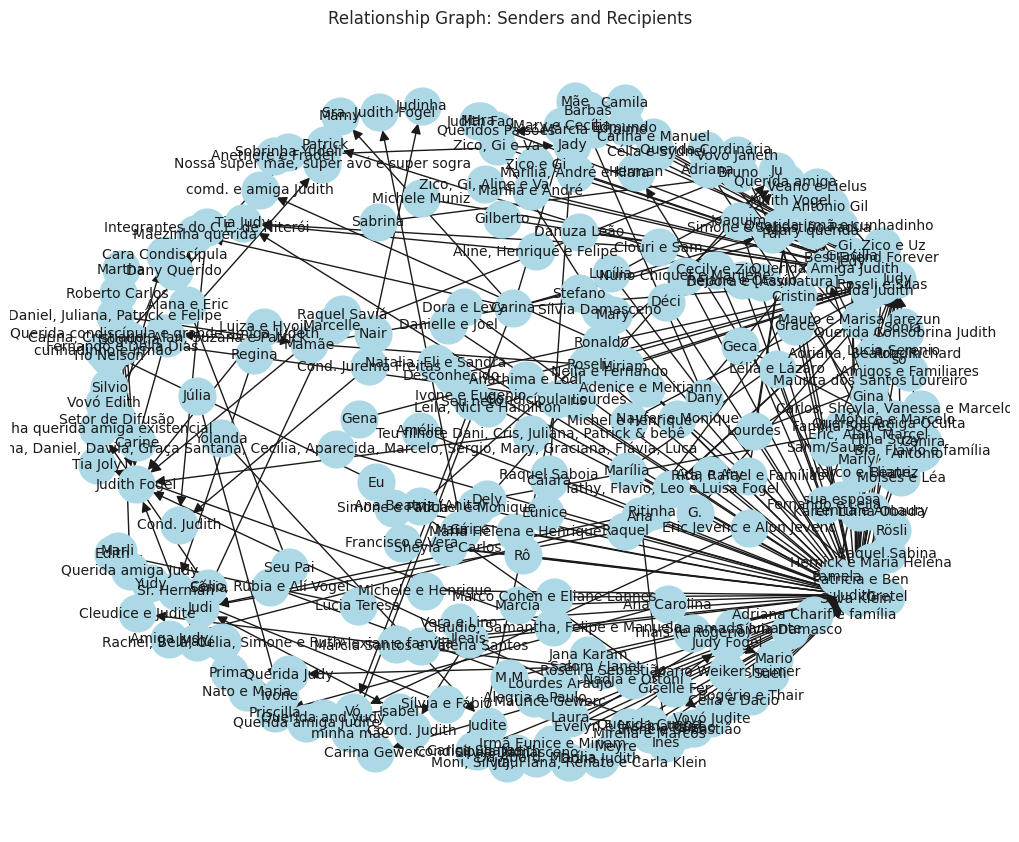

In [58]:
# Relationship Graph of Senders and Recipients
import networkx as nx

G = nx.DiGraph()
for _, row in df.iterrows():
    sender = row['from']
    recipient = row['to']
    if sender and recipient:
        G.add_edge(sender, recipient)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, arrowsize=15)
plt.title('Relationship Graph: Senders and Recipients')
plt.show()

In [57]:
# Clustering Letters by Content Similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

# Prepare text data
pt_stopwords = stopwords.words('portuguese')
texts = df['text'].dropna().tolist()
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=pt_stopwords)
X = vectorizer.fit_transform(texts)

# Cluster into 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = -1
df.loc[df['text'].notnull(), 'cluster'] = kmeans.fit_predict(X)

# Show cluster sizes
print(df['cluster'].value_counts())

cluster
1    72
4    49
3    49
0    47
2    32
Name: count, dtype: int64


/tmp/ipykernel_743/271592524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = -1
